In [1]:
library(Matrix)
library(far)
library(MASS)
library(pracma)

Loading required package: nlme
far library : Modelization for Functional AutoRegressive processes

version 0.6-4 (2014-12-07)


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



### Solving systems of equations

- by comparing the rank of $A$ and the argumented matrix, we can find out if the systems of equations have
  - exactly one solutions, (this is case when $A$ is ```invertible```)
  - many solutions, (the solution set exist in ```hyperplane``` which is ```affine nullspace of $A$```)
  - no solutions (rank of the ```argumented matrix``` is greater than rank of $A$)

In [64]:
a1 <- c(1,1,1,1,2)
a2 <- c(2,1,4,3,4)
a3 <- c(3,4,1,2,6)

a <- c(a1,a2,a3)

A <- matrix(a,nrow=3,byrow=T)
A

1,1,1,1,2
2,1,4,3,4
3,4,1,2,6


In [38]:
rref(A)

1,0,3,2,2
0,1,-2,-1,0
0,0,0,0,0


## Example 1:  $A\vec{x}=\vec{b}$ where $\vec{b}$= [3,4,11]<sup>T</sup>

- This is an example where you have $\infty$ number of solution
- Here is how you get particular solution

In [39]:
b <- matrix(c(3,4,11), nrow=3)
Ab <- cbind(A,b)
cat("Rank of matrix A is" , Rank(A), "and the Rank of matrix A|b is", Rank(Ab))

Rank of matrix A is 2 and the Rank of matrix A|b is 2

In [40]:
cat("Rank of nullspace of matrix A is", Rank(null(A)))

Rank of nullspace of matrix A is 3

- Then, according to ```Rouche-Capelli Theorem```, you have $\infty$ number of solutions

In [42]:
B <- A[,c(1,2)]
B

1,1
2,1
3,4


In [54]:
G <- t(B)%*%(B)
x_b <- inv(G)%*%t(B)%*%b
x_b

1
2


In [50]:
x_sol <- matrix(c(1,2,0,0,0),nrow=5)
x_sol

1
2
0
0
0


In [51]:
A%*%x_sol

3
4
11


## Example 2: $A\vec{x}=\vec{b}$ where $\vec{b}$= [3,4,11]<sup>T</sup>
- How to adjust the weight of basis when the weight of nonbasic vectors are given

In [65]:
B <- A[,c(1,2)]
B


1,1
2,1
3,4


In [66]:
N <- A[,-c(1,2)]
N

1,1,2
4,3,4
1,2,6


- the weight of the nonbasic variables are given here.
- Update the RHS by $N\vec{x}_N$

In [67]:
x_N <- matrix(c(100,200,-20),nrow=3)
RHS <- b - N%*%x_N
RHS 

-257
-916
-369


now solve

$$B\vec{x}_B+N\vec{x}_N = \vec{b}$$

where <br> 
$A = [B|N]$ <br>
$B$ is matrix containing independent column vectors <br>
$N$ is matrix containing dependent column vectors
      

$B^TB\vec{x}_B = B^T\vec{b} - B^TN\vec{x}_N$ <br>
$\vec{x}_B = (B^TB)^{-1}B^T$ $\vec{b} - (B^TB)^{-1}B^TN\vec{x}_N$

In [68]:
t(B)%*%RHS

-3196
-2649


In [69]:
G <- t(B)%*%(B)
x_B <- solve(G)%*%t(B)%*%RHS
x_B

-659
402


In [71]:
x <- rbind(x_B, x_N)
x

-659
402
100
200
-20


### checking the answer

In [72]:
A%*%x

3
4
11


In [73]:
cat("Rank of A is" , Rank(A), "while the Rank of A|b is", Rank(Ab))

Rank of A is 2 while the Rank of A|b is 2

## Example 3:  𝐴𝑥⃗ =𝑏⃗   with no solution case

In [74]:
a1 <- c(1,2,2,2)
a2 <- c(2,4,6,8)
a3 <-  c(3,6,8,10)

a <- c(a1,a2,a3)

A <- matrix(a,nrow=3,byrow=T)
A

1,2,2,2
2,4,6,8
3,6,8,10


In [76]:
b <- matrix(c(3,6,7),nrow=3)
b

3
6
7


In [77]:
Ab <- cbind(A,b)

In [78]:
cat("Rank of matrix A is" , Rank(A), "and the Rank of matrix A|b is", Rank(Ab))

Rank of matrix A is 2 and the Rank of matrix A|b is 3

- Then, according to ```Rouche-Capelli Theorem```, you have no solutions.


$$\hat{\vec{b}} \neq \vec{b}$$ 
where <br>
$\hat{\vec{b}} \in C(A)$, where $C(A)$ is a column space of $A$, among all the vectors in C(A). <br>


$$\vec{b} = \hat{\vec{b}} + \vec{b}_N$$ 
where <br>
$\vec{b}_N$ is a member of $N(A^T)$, left nullspace
<br>
Then, the above equation can be written as the following:


$$\vec{b} = B_{C(A)}\vec{x}_{C(A)} + B_{N(A^T)}\vec{x}_{N(A^T)}$$

where <br> 
$B_{C(A)}$ and $B_{N(A^T)}$ are the basis of $C(A)$ and $N(A^T)$ <br>
$\vec{x}_{C(A)}$ and $\vec{x}_{N(A^T)}$ are the coordinate of the corresponding basis<br> <br>
Subsituting $B_{C(A)}$ as $B_{C(A)}$ and $\vec{x}_{C(A)}$ as $\vec{x}_B$, the above equation can be written as the following: 

$$B^T\vec{b} = B^TB\vec{x}_{B}$$

$$\vec{x}_B = (B^TB)^{-1}B^T\vec{b}$$

<br> 

and $(B^TB)^{-1}B^T$ is called ```projection matrix of C(A)``` where $B$ are the basis of $C(A)$


In [83]:
rref(A)

1,2,0,-2
0,0,1,2
0,0,0,0


In [89]:
B <- A[,c(1,3)]
P <- inv(t(B)%*%B)%*%t(B)
x_B <- P%*%b
x_B

1.6666667
0.3333333


In [88]:
a <- c(x_B[1],0,x_B[2],0)
a

[1] 1.6666667 0.0000000 0.3333333 0.0000000

In [93]:
x <- matrix(a,nrow=4)
A%*%x  # this is the estimate of b

2.333333
5.333333
7.666667


In [92]:
b

3
6
7


## Example 4
Given:  <br><br>
$$x_1 - 5x_3  =1 $$
$$x_2 + x_3 = 4$$

In [4]:
a1 <- c(1,0,-5,1)
a2 <- c(0,1,1,4)
a3 <-  c(0,0,0,0)
a <- c(a1,a2,a3)

A <- matrix(a,nrow=3,byrow=T)
print(A)

     [,1] [,2] [,3] [,4]
[1,]    1    0   -5    1
[2,]    0    1    1    4
[3,]    0    0    0    0


In [5]:
print(rref(A))

     [,1] [,2] [,3] [,4]
[1,]    1    0   -5    1
[2,]    0    1    1    4
[3,]    0    0    0    0


$$ B\vec{X}_B + N\vec{X}_N = \vec{b}$$

In [10]:
B <- cbind(A[,1],A[,2]) #basic variable
N <- A[,3] #non basic variable
b <- A[,4] #RHS

print(inv(t(B)%*%B)%*%t(B)%*%b)

     [,1]
[1,]    1
[2,]    4


$x_1 = 1 + 5x_3$,  $x_2 = 4-x_3$, $x_3$ is free.

## Example 5
Given:

$$x_1+6x_2 + 3x_4 = 0$$
$$3x_3 - 4x_4 = 5$$
$$x_5 = 7$$

In [11]:
a1 <- c(1,6,0,3,0,0)
a2 <- c(0,0,1,-4,0,5)
a3 <-  c(0,0,0,0,1,7)
a <- c(a1,a2,a3)

A <- matrix(a,nrow=3,byrow=T)
print(A)

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    6    0    3    0    0
[2,]    0    0    1   -4    0    5
[3,]    0    0    0    0    1    7


In [12]:
print(rref(A))

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    6    0    3    0    0
[2,]    0    0    1   -4    0    5
[3,]    0    0    0    0    1    7


This is parametric description of solution set. Affine subspace or hyperplane.

$$x_1 = -6x_2 -3x_3$$
$$x_2 \text{ is free}$$
$$x_3 = 5 +4x_4$$
$$x_4 \text{ is free}$$
$$x_5 = 7$$

## Example Network flow
- The following figure shows the traffic flow (in vehicles per hour) over several one-way streets.  Determine the general flow pattern for the network.

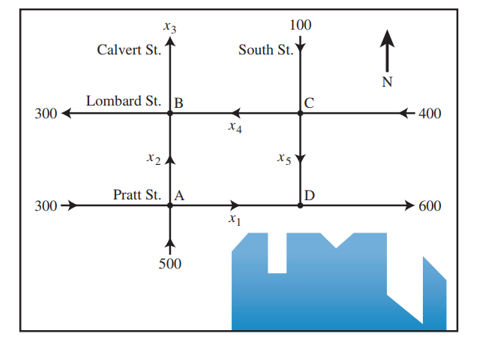


Solution:
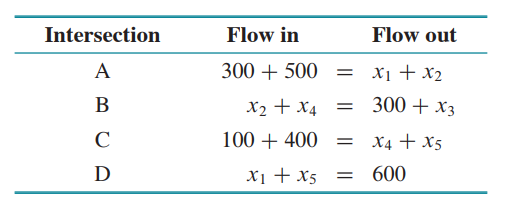

In [15]:
a1 <- c(1,1,0,0,0,800)
a2 <- c(0,1,-1,1,0,300)
a3 <-  c(0,0,0,1,1,500)
a4 <-  c(1,0,0,0,1,600)
a5 <-  c(0,0,1,0,0,400)
a <- c(a1,a2,a3,a4,a5)

A <- matrix(a,nrow=5,byrow=T)
print(A)

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    1    0    0    0  800
[2,]    0    1   -1    1    0  300
[3,]    0    0    0    1    1  500
[4,]    1    0    0    0    1  600
[5,]    0    0    1    0    0  400


In [16]:
print(rref(A))

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    0    0    0    1  600
[2,]    0    1    0    0   -1  200
[3,]    0    0    1    0    0  400
[4,]    0    0    0    1    1  500
[5,]    0    0    0    0    0    0


In [18]:
Rank(A)

[1] 4





- 